In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [23]:
from google.colab import files
uploaded = files.upload()

Saving insurance.csv to insurance (1).csv


In [38]:
df = pd.read_csv("insurance.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


Исследовать данные.

In [39]:
print(df.isna().sum())

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [51]:
sorted(df['charges'].unique())[-20:]

[47462.894,
 47496.49445,
 47896.79135,
 47928.03,
 48173.361,
 48517.56315,
 48549.17835,
 48673.5588,
 48675.5177,
 48824.45,
 48885.13561,
 48970.2476,
 49577.6624,
 51194.55914,
 52590.82939,
 55135.40209,
 58571.07448,
 60021.39897,
 62592.87309,
 63770.42801]

In [40]:
from sklearn.preprocessing import LabelEncoder
cols = ['sex', 'smoker', 'region']
#
# Encode labels of multiple columns at once
#
df[cols] = df[cols].apply(LabelEncoder().fit_transform)
#
# Print head
#
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [52]:
len(df)

1338

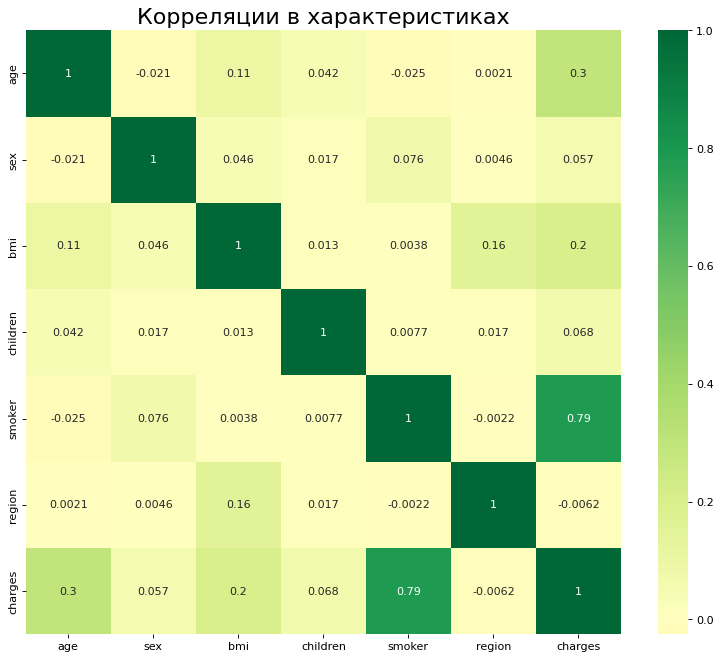

In [41]:
plt.figure(figsize=(12,10), dpi= 80)
sns.heatmap(df.corr(), xticklabels=df.corr().columns, yticklabels=df.corr().columns, cmap='RdYlGn', center=0, annot=True)
plt.title('Корреляции в характеристиках', fontsize=20)
plt.show()

Построить модель линейной регрессии.

In [42]:
y = df['charges']
x = df.drop(columns='charges')
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [43]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

Получить коэффиценты уравнения линейной регрессии.

In [44]:
w0 = model.intercept_
w1 = model.coef_
print(w0, w1)

-12585.599019240803 [  258.41660834  -240.68683911   361.47249036   343.60250277
 23803.98790682  -318.81208381]


Написать уравнение линейной регрессии.

In [85]:
ans = str(w0)
for i in range(5):
  ans = ans + ' + ' + str(w1[i]) + ' * ' + list(df.columns)[i]
print(ans)

-12585.599019240803 + 258.41660834193635 * age + -240.6868391085746 * sex + 361.47249036269955 * bmi + 343.6025027693421 * children + 23803.98790682387 * region


Визуализировать данные и полученное уравнение линейной регрессии.

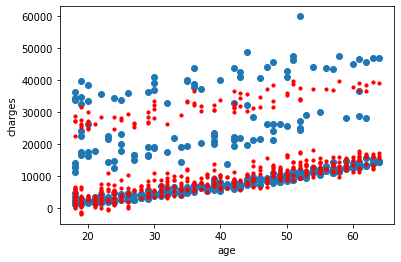

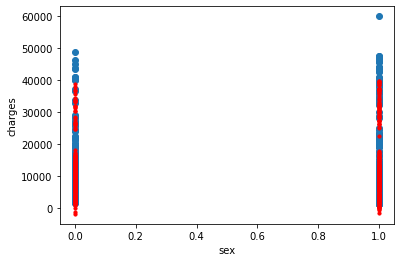

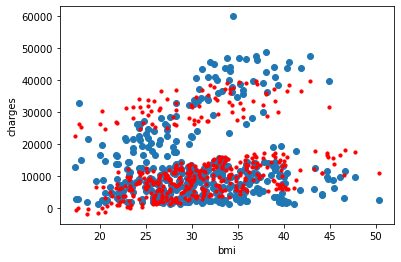

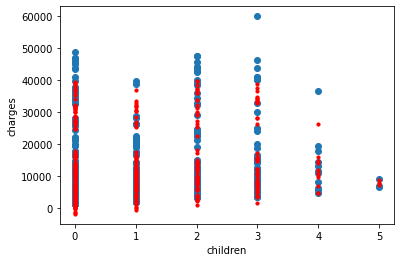

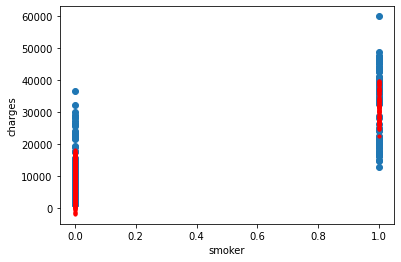

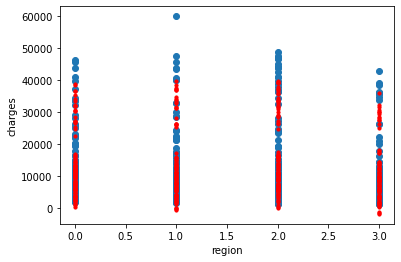

In [46]:
import matplotlib.pyplot as plt
y_pred = model.predict(X_test)
for col in X_test.columns:
  plt.scatter(X_test[col], y_test)
  plt.scatter(X_test[col], y_pred, color='red', s=10)
  plt.xlabel(col)
  plt.ylabel('charges')
  plt.show()

Оценивать полученную модель с помощью MSE, MAE, R2.

In [47]:
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('R2 score:', r2_score(y_test, y_pred))

Mean Absolute Error: 4217.343167487718
Mean Squared Error: 37092953.60251614
R2 score: 0.7416793868494503


Сделать письменный вывод получившихся результатов (хорошая или плохая получлась оценка MSE и почему), привести восстановленное линейное уравнение регрессии, сделать вывод какие из признаков оказались наиболее значимыми, какие нет и почему.

Оценки показывают приемлимые результаты работы модели. MAE достаточно большая, но это связано с наличием большого количества выбросов в данных, а линейная регрессия это довольно простая модель, чтобы учесть их правильно. Предположительно большинство выбросов связано с "курильщиками". Можно было бы разделить выборку на 2 по данному признаку и построить 2 отдельные модели для каждой из них.

In [53]:
mas = []
i = 0
for key in X_train.keys():
  mas.append((key, w1[i]))
  i += 1
mas.sort(key=lambda x: abs(x[1]))
mas

[('sex', -240.6868391085746),
 ('age', 258.41660834193635),
 ('region', -318.8120838127077),
 ('children', 343.6025027693421),
 ('bmi', 361.47249036269955),
 ('smoker', 23803.98790682387)]

Видно, что наибольшее влияние на стоимость лечения оказывает именно факт (наличия или отсутствия) привычки курить

In [82]:
# ДОПОЛНИТЕЛЬНО модели для разделенных выборок

In [89]:
# некурящие
df = pd.read_csv("insurance.csv")
cols = ['sex', 'smoker', 'region']
df[cols] = df[cols].apply(LabelEncoder().fit_transform)
df = df[df['smoker']==1]
df = df.drop(columns=['smoker'])

In [90]:
df

,age,sex,bmi,children,region,charges
0,19,0,27.900,0,3,16884.92400
11,62,0,26.290,0,2,27808.72510
14,27,1,42.130,0,2,39611.75770
19,30,1,35.300,0,3,36837.46700
23,34,0,31.920,1,0,37701.87680
...,...,...,...,...,...,...
1313,19,0,34.700,2,3,36397.57600
1314,30,0,23.655,3,1,18765.87545
1321,62,1,26.695,0,0,28101.33305
1323,42,0,40.370,2,2,43896.37630


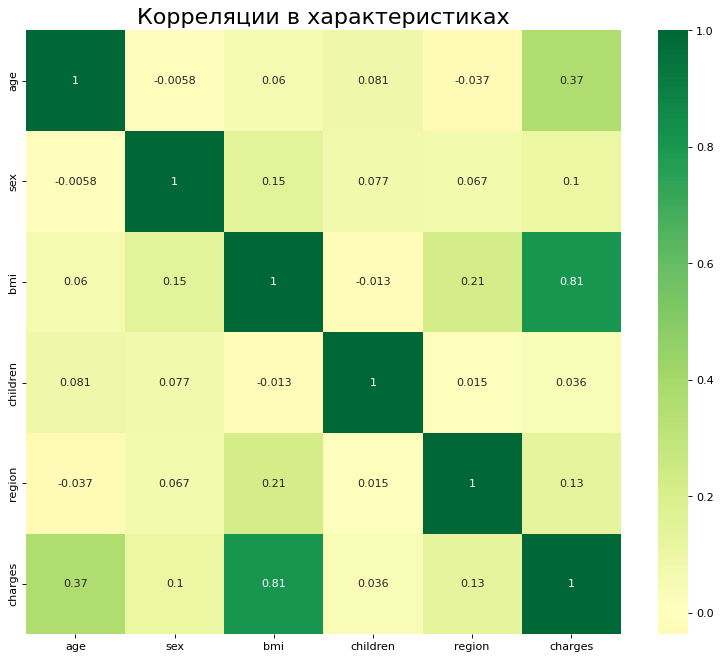

In [91]:
plt.figure(figsize=(12,10), dpi= 80)
sns.heatmap(df.corr(), xticklabels=df.corr().columns, yticklabels=df.corr().columns, cmap='RdYlGn', center=0, annot=True)
plt.title('Корреляции в характеристиках', fontsize=20)
plt.show()

In [92]:
# модель
y = df['charges']
x = df.drop(columns='charges')
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [93]:
# коэфициенты 
w0 = model.intercept_
w1 = model.coef_
ans = str(w0)
for i in range(5):
  ans = ans + ' + ' + str(w1[i]) + ' * ' + list(df.columns)[i]
print(ans)

-22571.56717391237 + 242.76113879457677 * age + -1006.0497561909725 * sex + 1489.1707253829331 * bmi + 194.9177150271197 * children + -291.3312334662607 * region


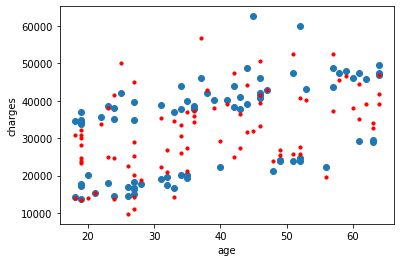

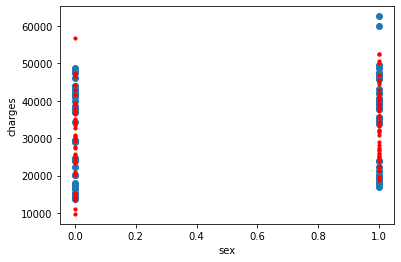

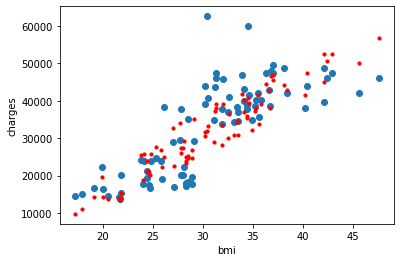

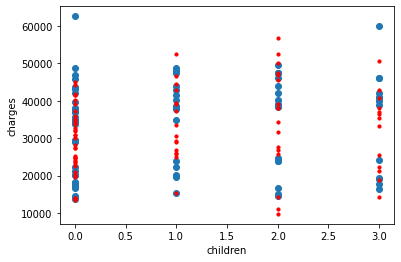

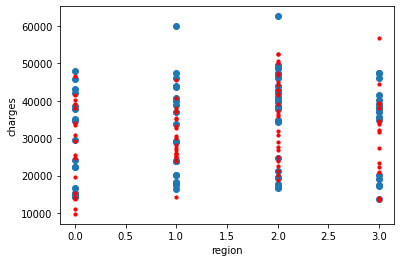

In [94]:
import matplotlib.pyplot as plt
y_pred = model.predict(X_test)
for col in X_test.columns:
  plt.scatter(X_test[col], y_test)
  plt.scatter(X_test[col], y_pred, color='red', s=10)
  plt.xlabel(col)
  plt.ylabel('charges')
  plt.show()

In [95]:
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('R2 score:', r2_score(y_test, y_pred))

Mean Absolute Error: 4836.025882221677
Mean Squared Error: 42262445.98264229
R2 score: 0.7178324241835229
